In [11]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

engine = create_engine("sqlite+pysqlite:///../../logs_data.db", echo=False)

data = pd.read_sql_table("web_logs", engine, index_col="timestamp", parse_dates=["timestamp"])
data.head()


,client_ip,response_code,response_size_bytes,user_agent,url,country,country_code,region,region_name,city,zip,lat,lon,isp,organization,autonomous_system
timestamp,,,,,,,,,,,,,,,,
2015-05-17 08:05:32,93.180.71.3,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),/downloads/product_1,The Netherlands,NL,ZE,Zeeland,Flushing,4382,51.4544,3.592250,Cldin B.V.,Cldin B.V,AS48635 CLDIN B.V.
2015-05-17 08:05:23,93.180.71.3,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),/downloads/product_1,The Netherlands,NL,ZE,Zeeland,Flushing,4382,51.4544,3.592250,Cldin B.V.,Cldin B.V,AS48635 CLDIN B.V.
2015-05-17 08:05:24,80.91.33.133,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),/downloads/product_1,Norway,NO,03,Oslo County,Oslo,0566,59.9016,10.734300,Schibsted ASA,Schibsted ASA,AS21171 Schibsted ASA
2015-05-17 08:05:34,217.168.17.5,200,490,Debian APT-HTTP/1.3 (0.8.10.3),/downloads/product_1,United Kingdom,GB,ENG,England,London,W1B,51.5072,-0.127586,Acora Limited,Veber,AS29006 Acora Limited
2015-05-17 08:05:09,217.168.17.5,200,490,Debian APT-HTTP/1.3 (0.8.10.3),/downloads/product_2,United Kingdom,GB,ENG,England,London,W1B,51.5072,-0.127586,Acora Limited,Veber,AS29006 Acora Limited


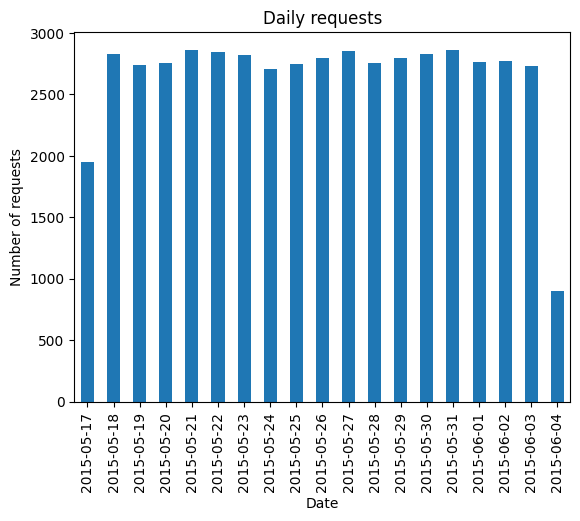

In [14]:
# Daily requests bar plot
data["date"] = data.index.date
daily_requests = data.groupby("date").size()
daily_requests.plot(kind="bar", title="Daily requests", xlabel="Date", ylabel="Number of requests")
plt.show()


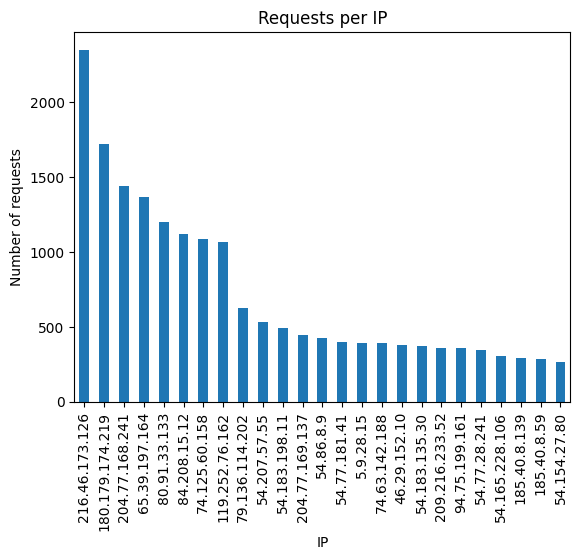

In [17]:
# Requests per IP bar plot
requests_per_ip = data.value_counts("client_ip").head(25)
requests_per_ip.plot(kind="bar", title="Requests per IP", xlabel="IP", ylabel="Number of requests")
plt.show()


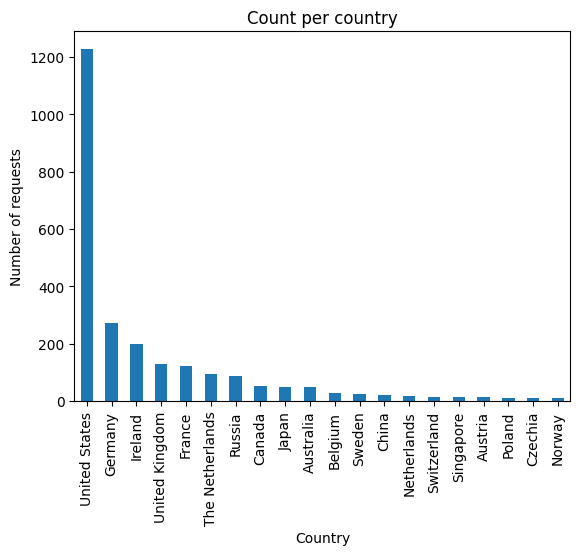

In [19]:
# Count per country bar plot, per unique IP
ips_not_duplicated = data.drop_duplicates("client_ip")
ips_not_duplicated["country"].value_counts().head(20).plot(
    kind="bar", title="Count per country", xlabel="Country", ylabel="Number of requests"
)
plt.show()


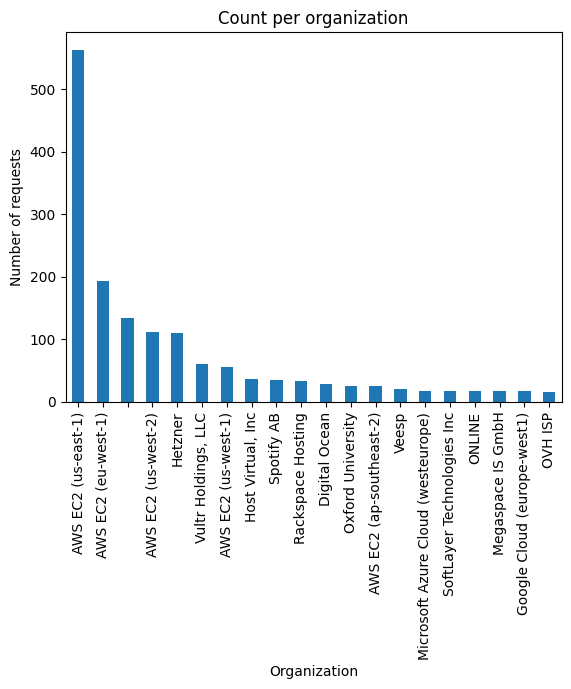

In [21]:
# Count per organization bar plot, per unique IP
ips_not_duplicated["organization"].value_counts().head(20).plot(
    kind="bar", title="Count per organization", xlabel="Organization", ylabel="Number of requests"
)
plt.show()


In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

geometry = [Point(xy) for xy in zip(ips_not_duplicated["lon"], ips_not_duplicated["lat"])]
gdf = GeoDataFrame(ips_not_duplicated, geometry=geometry)
world = gpd.read_file(url)
gdf.plot(ax=world.plot(figsize=(10, 6)), marker="o", color="red", markersize=15)


c:\LEON\ICTA\Tečaji\icta-python-osnovni-public\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: HTTP response code on https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip: 0
  return ogr_read(


DataSourceError: '/vsizip/vsicurl/https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip' does not exist in the file system, and is not recognized as a supported dataset name.